<a href="https://colab.research.google.com/github/tripathysagar/ch2_odia_letter/blob/master/odia_letter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [1]:
odia_words = ['ଅ', 'ଆ', 'ଇ' , 'ଈ' , 'ଉ' , 'ଊ' , 'ଋ' , 'ଏ' , 'ଐ' , 'ଓ' , 'ଔ', 'କ', 'ଖ', 'ଗ', 'ଘ', 'ଙ', 'ଚ', 'ଛ', 'ଜ', 'ଝ', 'ଞ', 'ଟ', 'ଠ', 'ଡ', 'ଢ', 'ଣ', 
'ତ', 'ଥ', 'ଦ', 'ଧ', 'ନ', 'ପ', 'ଫ', 'ବ', 'ଭ', 'ମ', 'ଯ', 'ୟ', 'ର', 'ଳ', 'ଲ', 'ଵ', 'ଶ', 'ଷ', 'ସ', 'ହ', 'କ୍ଷ']

The aim of this notebook, is to perform basic **classifcation of Odia words**. The classes are following:

```
'ଅ', 'ଆ', 'ଇ' , 'ଈ' , 'ଉ' , 'ଊ' , 'ଋ' , 'ଏ' , 'ଐ' , 'ଓ' , 'ଔ', 'କ', 'ଖ', 'ଗ', 'ଘ', 'ଙ', 'ଚ', 'ଛ', 'ଜ', 'ଝ', 'ଞ', 'ଟ', 'ଠ', 'ଡ', 'ଢ', 'ଣ', 
'ତ', 'ଥ', 'ଦ', 'ଧ', 'ନ', 'ପ', 'ଫ', 'ବ', 'ଭ', 'ମ', 'ଯ', 'ୟ', 'ର', 'ଳ', 'ଲ', 'ଵ', 'ଶ', 'ଷ', 'ସ', 'ହ', 'କ୍ଷ'
```

Please upload the image just like the below as the **Resnet34** model is trained in the following texture. 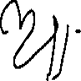




In [ ]:
path = Path()
learn_inf = load_learner(path/'export_res34.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [ ]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))

    pred,pred_idx,probs = learn_inf.predict(img)
    pred_word = odia_words[int(pred)- 1]

    lbl_pred.value = f'Prediction: {pred_word}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_upload.observe(on_data_change, names=['data'])

In [ ]:
display(VBox([widgets.Label('Select a odia letter!'), btn_upload, out_pl, lbl_pred]))